<a href="https://colab.research.google.com/github/julianasaha/food-sales-predications/blob/main/Food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [364]:
# Load the data
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df_ml= df.copy()

In [365]:
# Size of the data (rows, columns)
df.shape

(8523, 12)

In [366]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 4 floats, 1 integer and 7 objects.

In [367]:
# Find duplicates
df.duplicated().sum()

0

In [368]:
# Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 out of 7060 values missing from Item_Weight. 
There are 2410 out of 6113 values missing from Outlet_Size. 

In [369]:
# Address the missing values in the columns

# Drop column
df.drop(columns= ['Item_Weight'], inplace = True)

In [370]:
# Fill in the missing values
df['Outlet_Size'].fillna('Missing', inplace=True)


-  I have decided to remove the Item_weight column because I believe it is not essential information that will help increase prices. A lighter weight item can be just as vauable as a heavy item. 


-  I have decided to fill in the missing values of Outlet_Size with 'Missing' because it is likely that we can find out the size of a store later by looking it up online or even looking at the google maps to  get an estimate on how big a store is.I also believe that keeping this column is important because the size of a store can impact sales as they are able to carry more products if the store is larger.

In [371]:
# Check that missing values have been addressed
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [372]:
# Find and fix any inconsistent categories of data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [373]:
# Obtain the summary statistics of each (min, max, mean) in the numerical columns
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


**Histogram**

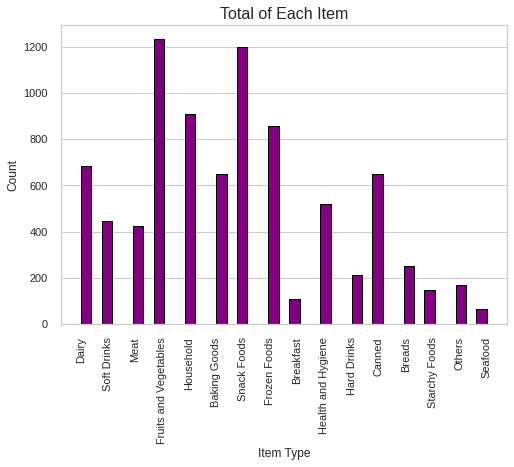

In [374]:
# Find out the quality of each type of item and using a histogram to represent the data
df['Item_Type'].hist(bins='auto', edgecolor='black', facecolor='purple')
plt.style.use('seaborn')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Total of Each Item',fontsize = 16)
plt.xticks(rotation = 90)
plt.grid(axis = 'x');

The top three carried item types at these stores are 

1.   Fruit and Vegatables
2.   Snack Foods
3.   Household


**Boxplot**

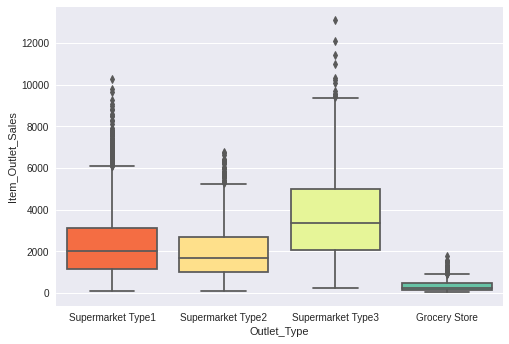

In [375]:
# Present a five number summaray for each store using a boxplot
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',orient='v', saturation=1,
            order=['Supermarket Type1', 'Supermarket Type2','Supermarket Type3','Grocery Store'], palette="Spectral");

The boxplot indicates that Supermarket 'Type3' has the highest sales while 'Grocery Store' has the lowest.

**Heatmap**

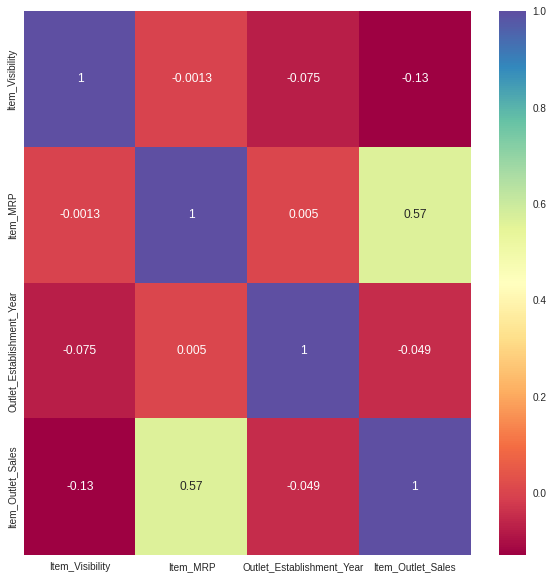

In [376]:
# Find the correlation coefficients between two variables 
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Spectral', annot=True, );

The strongest correlation indicated in this graph is between 'Item_MRP' and the weakest correlation is between 'Item_Visibility' and 'Item_Outlet_Sales'. Overall, there isn't any strong correlations, only moderate and low.

**Bar Chart**

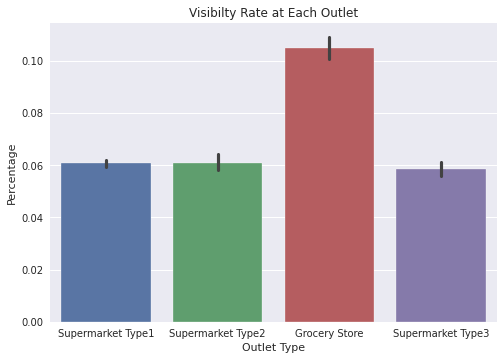

In [377]:
#graph the visibilty rate at each store 
ax = sns.barplot(data= df, x= 'Outlet_Type', y= 'Item_Visibility');
ax.set_title('Visibilty Rate at Each Outlet')
ax.set_ylabel('Percentage', )
ax.set_xlabel('Outlet Type')
plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['axes.labelsize'] = 'x-large'
sns.set_theme(style="whitegrid", palette="Spectral")

We can see here that 'Grocery Store' has a significantly higher percentage of display area although it is the store while the lowest sales. Havig a low percenatge of display area could be a factor when increasing food sales as it has worked for the other stores being compared.

**Scatter Plot**

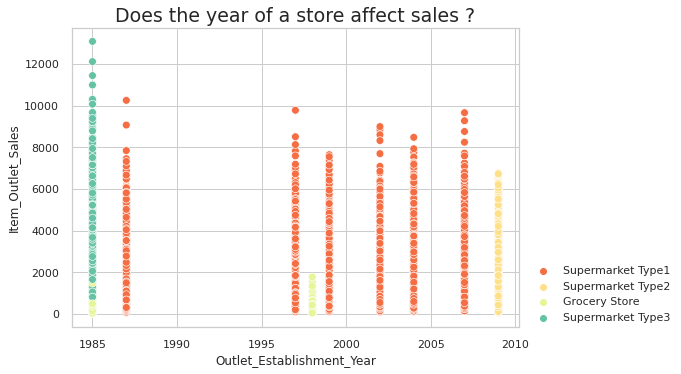

In [378]:
# Grapgh the years of the outlet type
ax = sns.scatterplot(data=df, x = 'Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Outlet_Type', palette = "Spectral", s=60)
ax.legend(loc=(1.02,0))
ax.set_title('Does the year of a store affect sales ?', fontsize=19);

The two oldest outlets are 'Supermarket Type3' and 'Grocery Store'.

# Machine Learning Part

In [379]:
# import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')


In [380]:
# load the data
df_ml.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [381]:
# inspect the data
print(df_ml.info(), '\n')
print(df_ml.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

In [382]:
# Ordinal Encoding
df_ml['Outlet_Size'].value_counts()
# Ordinal Encoding 'Complication_risk'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df_ml['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df_ml['Outlet_Size']


0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [383]:
# Divide features and target
# Split
# Remove irrevelant features that do not help predict our target
# Identifers and Establishment Year have no correlation to sales
X = df_ml.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)
y = df_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [384]:
# Category features
cat_selector = make_column_selector(dtype_include='object')
# Imputers
const_imputer = SimpleImputer(strategy='constant')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Categorical pipeline
categorical_pipe = make_pipeline(const_imputer, ohe)
categorical_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [385]:
# Numerical features
num_selector = make_column_selector(dtype_include='number')
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [386]:
# Combine pipes
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e16e190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e46ed90>)])

In [387]:
# Fit on train (NEVER ON TEST)
preprocessor.fit(X_train)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [388]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
# FINAL RESULT
X_train_processed


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 32)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

#Linear Regression

In [389]:
# Build a linear regression model

#Imports needed for a linear regression model and for the evaluation of model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [390]:
# Make and fit a linear regression model
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e16e190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e46ed90>)])),
                ('linearregression', LinearRegression())])

In [391]:
# Get predictions for train and test data
pred_train = reg_pipe.predict(X_train)
pred_test = reg_pipe.predict(X_test)

In [392]:
# Measuring model performance
print(f"Train R-Squared: { round( reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.561
Test R-Squared: 0.566


In [393]:
# Calculate RMSE for train vs test
rmse_train =  mean_squared_error(y_train, pred_train, squared=False)
rmse_test = mean_squared_error(y_test, pred_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 1140.25
Test RMSE: 1094.72


#Regression Tree Model

In [394]:
# Build a regression model

# Import the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

# Instantiate, make pipeline and fit the model
dec_tree = DecisionTreeRegressor(random_state = 42)

dec_pipe = make_pipeline(preprocessor, dec_tree)

dec_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e16e190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd8e46ed90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [395]:
# Make predictions for test and train
pred_train2 = dec_pipe.predict(X_train)
pred_train2 = dec_pipe.predict(X_test)

In [396]:
# Evaluate the model
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)



1.0
0.15986423123635318


The train set has a perfect score while the test has a significally lower score.
- We can tune our model for a better result

In [397]:
# Create a range of max_depth values to loop over
depths = range(1, 38)
# Create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)
# Loop over the values in the depths range 
for depth in depths:
  # fit a new model with the depth
  dec = DecisionTreeRegressor(max_depth=depth)
  # put model in a pipeline
  dec_pipe = make_pipeline(preprocessor, dec)
  # fit the model
  dec_pipe.fit(X_train, y_train)
  # create prediction arrays
  train_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)

  # evaluate the model using R2 score
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  # store the scores in a dataframe
  scores.loc[depth, 'Train'] = train_r2
  scores.loc[depth, 'Test'] = test_r2

In [398]:
# Sort scores
scores.sort_values(by='Test', ascending=False).head()

,Train,Test
5,0.603932,0.59472
6,0.615139,0.584559
4,0.582625,0.584005
7,0.626772,0.580126
8,0.642778,0.569368


In [399]:
# Rewrite decision tree regressor with the optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_pipe5 = make_pipeline(preprocessor, dec_tree_5)
dec_pipe5.fit(X_train,y_train)
train_5_score = dec_pipe5.score(X_train, y_train)
test_5_score = dec_pipe5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)



0.603931621085344
0.5947201327889511


In [400]:
# Make predictions for test and train
pred_train3 = dec_pipe5.predict(X_train)
pred_test3 = dec_pipe5.predict(X_test)

In [401]:
# Calculate RMSE 
train_RMSE = np.sqrt(np.mean(np.abs(pred_train3- y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(pred_test3- y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1082.6572972836627
Model Testing RMSE: 1057.4298789236952


In [402]:
# Measuring model performance
print(f"Train R-Squared: { round( train_5_score,3) }")
print(f"Test R-Squared: { round( test_5_score,3) }")

Train R-Squared: 0.604
Test R-Squared: 0.595


#Overall, I recommend the better model that is the **Decision Tree Model** because by comparing the two, the DTM has a higher R2 than the linear regression model. RMSE is also lower in the DTM meaning there are less larger errors in the model.